# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*The Messi-Ronaldo rivalry provides an intriguing opportunity for a data analysis project in the realm of professional football statistics. This project aims to delve into the performance data of Lionel Messi and Cristiano Ronaldo over the course of their club goals in their careers and uncover patterns, trends, and insights that have defined this legendary rivalry.*

Research Q1: Show the relationship between Messi & Ronaldo goals and the Venue they scored in whether it was Home or Away, provide a visulization.

Research Q2: Show the relationship between Messi & Ronaldo goals and the Club they scored for in each of their goals, provide a visulization.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [23]:
#importing packages
import pandas as pd
import numpy
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt




#### **Dataset 1: Messi all club goals dataset**
I picked this dataset because of the famous rivalry between Messi and Ronaldo, and since Messi is a part of it. and I decided to pick one of the most significant metrics in the football industry (Club goals), so I chose this dataset.

Type: *CSV File* 

Method: *Manually downloaded data from kaggle* 

Dataset variables:

*   *Season*
*   *Competition*
*   *Matchday*
*   *Date*
*   *Venue*
*   *Club*
*   *Opponent*
*   *Result*
*   *Playing_Position*
*   *Minute*
*   *At_score*
*   *Type*
*   *Goal-assist*

In [24]:
#Downloaded data manually from kaggle, and uploaded data to the jupyter notebook.
messi_data = pd.read_csv("Messi_data.csv")

#using .head to inspect dataframe
print(messi_data.sample(10))

distinct = messi_data['Club'].unique()

print(distinct)

     Season            Competition Matchday      Date Venue          Club  \
642   20/21                 LaLiga       14  12/19/20     H  FC Barcelona   
347   13/14                 LaLiga       30   3/26/14     H  FC Barcelona   
2     05/06                 LaLiga       13  11/27/05     H  FC Barcelona   
667   20/21                 LaLiga       33   4/29/21     H  FC Barcelona   
542   17/18                 LaLiga       30   3/31/18     A  FC Barcelona   
243  11-Dec                 LaLiga       36   4/29/12     A  FC Barcelona   
223  11-Dec  UEFA Champions League  last 16  03/07/12     H  FC Barcelona   
22    06/07                 LaLiga       37  06/09/07     H  FC Barcelona   
238  11-Dec                 LaLiga       32  04/07/12     A  FC Barcelona   
392   14/15                 LaLiga       26  03/08-15     H  FC Barcelona   

                   Opponent Result Playing_Position Minute At_score  \
642             Valencia CF   2:02              CF    45+4     1:01   
347       

#### Dataset 2: Cristiano all club goals dataset
I picked this dataset because of the famous rivalry between Messi and Ronaldo, and since Cristiano is a part of it. and I decided to pick one of the most significant metrics in the football industry (Club goals), so I chose this dataset.

Type: *CSV FIle*

Method: *Gathered data by programmatically downloading files*

Dataset variables:

*   *Season*
*   *Competition*
*   *Matchday*
*   *Date*
*   *Venue*
*   *Club*
*   *Opponent*
*   *Result*
*   *Playing_Position*
*   *Minute*
*   *At_score*
*   *Type*
*   *Goal-assist*

In [25]:
# Make directory if it doesn't already exist

folder_name = 'Cristiano_all_club_goals'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [26]:
cristiano_goals_url = 'https://raw.githubusercontent.com/azminewasi/Cristiano-Ronaldo-Club-Goals/ba9caaf25f98c7ef6992781c080241f63891c844/data.csv'

#Create an HTTP GET request for Ebert reviews
response = requests.get(cristiano_goals_url)

#Raise an exception if we made a request resulting in an error
response.raise_for_status()

#Define the filepath by incorporating the folder_name and the last part of the url
file_path = os.path.join(folder_name, cristiano_goals_url.split('/')[-1])
print (file_path)

#Writing in binary mode
with open(file_path, mode = 'wb') as file:
    file.write(response.content)
    
cristiano_data = pd.read_csv('Cristiano_all_club_goals/data.csv')

#using .head to inspect dataframe
cristiano_data.head

Cristiano_all_club_goals/data.csv


<bound method NDFrame.head of     Season               Competition      Matchday      Date Venue  \
0    02/03             Liga Portugal             6  10-07-02     H   
1    02/03             Liga Portugal             6  10-07-02     H   
2    02/03             Liga Portugal             8  10/26/02     A   
3    02/03  Taca de Portugal Placard  Fourth Round  11/24/02     H   
4    02/03  Taca de Portugal Placard   Fifth Round  12/18/02     H   
..     ...                       ...           ...       ...   ...   
705  22/23          Saudi Pro League            16    2/9/23     A   
706  22/23          Saudi Pro League            18   2/25/23     A   
707  22/23          Saudi Pro League            18   2/25/23     A   
708  22/23          Saudi Pro League            18   2/25/23     A   
709  22/23          Saudi Pro League            21   3/18/23     H   

            Club                 Opponent Result Playing_Position Minute  \
0    Sporting CP            Moreirense FC   3:00     

In [27]:
#first I will add a table(source) column to each dataset
messi_data['Table'] = 'Messi goal' 
cristiano_data['Table'] = 'Cristiano goal' 

#I will combine the two gathered datasets into one dataset
stacked_dataset = pd.concat([messi_data, cristiano_data], axis=0)

stacked_dataset = stacked_dataset.reset_index(drop = True)

#using .head to inspect dataframe
stacked_dataset.sample(10)


Season     Competition     Matchday      Date Venue               Club  \
936    11/12          LaLiga           17  12/17/11     A        Real Madrid   
775    07/08  Premier League           19  12/26/07     A  Manchester United   
1227   16/17          LaLiga           37   5/14/17     H        Real Madrid   
951    11/12          LaLiga           27  03-10-12     A        Real Madrid   
710    03/04          FA Cup  Fifth Round   2/14/04     H  Manchester United   
500    16/17          LaLiga           34   4/26/17     H       FC Barcelona   
962    11/12          LaLiga           33  04-11-12     A        Real Madrid   
281   Dec-13          LaLiga           15  12/09/12     A       FC Barcelona   
328    13/14    Copa del Rey      last 16  01/08-14     H       FC Barcelona   
753    06/07          FA Cup    6th round   3/19/07     H  Manchester United   

                 Opponent Result Playing_Position Minute At_score  \
936            Sevilla FC   2:06               LW     41     0:03   
775        Sunderland AFC   0:04              NaN     45     0:03   
1227           Sevilla FC   4:01               LW     78     3:01   
951   Real Betis Balompie   2:03               LW     52     1:02   
710       Manchester City   4:02               RW     74     3:00   
500            CA Osasuna   7:01              AM      12     1:00   
962    Atletico de Madrid   1:04               LW     24     0:01   
281   Real Betis Balompie   1:02               CF     16     0:01   
328             Getafe CF   4:00               CF   90+2     4:00   
753      Middlesbrough FC   1:00              NaN     76     1:00   

                   Type     Goal_assist           Table  
936   Right-footed shot   Karim Benzema  Cristiano goal  
775    Direct free kick             NaN  Cristiano goal  
1227   Left-footed shot      Toni Kroos  Cristiano goal  
951    Left-footed shot         Marcelo  Cristiano goal  
710   Right-footed shot             NaN  Cristiano goal  
500    Left-footed shot             NaN      Messi goal  
962    Direct free kick             NaN  Cristiano goal  
281    Left-footed shot  Andres Iniesta      Messi goal  
328    Left-footed shot       Alex Song      Messi goal  
753             Penalty             NaN  Cristiano goal

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [28]:
#Inspecting the dataframe visually by using sample function multiple times & checking the csv file

stacked_dataset.sample(10)

#After checking Some samples I noticed a lot of missing values in Goal_assist column 


#since it's irrelevant for this analysis I am gonna drop the column using 'drop function'

Season     Competition        Matchday      Date Venue  \
1366   20/21         Serie A              23   2/22/21     H   
197   11-Dec          LaLiga              11  10/29/11     H   
628    19/20          LaLiga              29   6/16/20     H   
155    10/11    Copa del Rey  Quarter-Finals  01/12/11     H   
8      05/06          LaLiga              24   2/18/06     H   
1401   21/22  Premier League              35  05-02-22     H   
142    10/11          LaLiga              10  11/07/10     A   
1005  Dec-13          LaLiga              21   1/27/13     H   
991   Dec-13          LaLiga              11  11-11-12     A   
281   Dec-13          LaLiga              15  12/09/12     A   

                   Club             Opponent Result Playing_Position Minute  \
1366        Juventus FC           FC Crotone   3:00               CF   45+1   
197        FC Barcelona         RCD Mallorca   5:00               CF     21   
628        FC Barcelona           CD Leganes   2:00              RW      69   
155        FC Barcelona  Real Betis Balompie   5:00               CF     44   
8          FC Barcelona  Real Betis Balompie   5:01               RW     84   
1401  Manchester United         Brentford FC   3:00               CF     61   
142        FC Barcelona            Getafe CF   1:03               CF     23   
1005        Real Madrid            Getafe CF   4:00               LW     72   
991         Real Madrid           Levante UD   1:02               CF     20   
281        FC Barcelona  Real Betis Balompie   1:02               CF     16   

     At_score               Type     Goal_assist           Table  
1366     2:00             Header    Aaron Ramsey  Cristiano goal  
197      2:00  Right-footed shot         Adriano      Messi goal  
628      2:00            Penalty             NaN      Messi goal  
155      1:00   Left-footed shot  Andres Iniesta      Messi goal  
8        5:01   Left-footed shot             NaN      Messi goal  
1401     2:00            Penalty             NaN  Cristiano goal  
142      0:01   Left-footed shot     David Villa      Messi goal  
1005     4:00            Penalty             NaN  Cristiano goal  
991      0:01  Right-footed shot             NaN  Cristiano goal  
281      0:01   Left-footed shot  Andres Iniesta      Messi goal

In [29]:
#Inspecting the dataframe programmatically
#showing some examples

selected_rows = stacked_dataset.Goal_assist.iloc[[1106,726,358,514]]
print(selected_rows)

#this is some examples for the missing values of 'Goal_assist' Column and we will fix it in later steps.

1106    NaN
726     NaN
358     NaN
514     NaN
Name: Goal_assist, dtype: object


Issue and justification: *The issue was that A lot of value in the column "Goal_assist" has NaN value which will ruin any further analysis that might be done on this column so I dropped the column since its  irrelevant for this analysis and has in accurate values*

### Quality Issue 2:

In [30]:
#Inspecting the dataframe visually by using sample function multiple times & checking the csv file

stacked_dataset.Competition.unique()


#After checking Some samples I noticed a problem with a specific value in 'Competition' Column 

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions', 'Troph�e des Champions',
       'Champions League', 'Liga Portugal', 'Taca de Portugal Placard',
       'Premier League', 'FA Cup', 'UEFA Champions League Qualifying',
       'EFL Cup', 'Serie A', 'Supercoppa Italiana', 'Italy Cup',
       'Europa League', 'Saudi Pro League'], dtype=object)

In [31]:
#Inspecting the dataframe programmatically
#showing all records that has the problem

stacked_dataset.query("Competition == 'Troph�e des Champions'")

#as you see 'Troph�e des Champions' is supposed to be 'Trophée des Champions' so we are going to
# replace values using 'replace function'

Season            Competition Matchday     Date Venue  \
686  22/23  Troph�e des Champions    Final  7/31/22     H   

                    Club   Opponent Result Playing_Position Minute At_score  \
686  Paris Saint-Germain  FC Nantes   4:00               CF     22     1:00   

                  Type Goal_assist       Table  
686  Right-footed shot         NaN  Messi goal

Issue and justification: *The issue was meaning the same competition but writing it in two different ways, this would affect further analysis since all goals with one name won't be counted and will be lost that is why we replaced the wrong values with right ones*

### Tidiness Issue 1:

In [32]:
#Inspecting the dataframe visually by using sample function multiple times & checking the csv file

stacked_dataset.sample(10)

#After checking Some samples I noticed a tidiness issue in the 'Result' column
#Each variable doesn't form a seperate column
#Because it shows the result of the match of the home and away teams in a single column

Season            Competition        Matchday      Date Venue  \
308   Dec-13                 LaLiga              29   3/30/13     A   
258   Dec-13              Supercopa           final   8/29/12     A   
1256   17/18  UEFA Champions League         last 16   2/14/18     H   
784    07/08         Premier League              24   1/30/08     H   
1385   21/22  UEFA Champions League     Group Stage  11-02-21     A   
118    09/10  UEFA Champions League  Quarter-Finals  04/06/10     H   
698    22/23                Ligue 1              18   1/11/23     H   
533    17/18                 LaLiga              21   1/28/18     H   
1267   17/18                 LaLiga              29   3/18/18     H   
567    18/19                 LaLiga              15  12/08-18     A   

                     Club                Opponent Result Playing_Position  \
308          FC Barcelona           Celta de Vigo   2:02              CF    
258          FC Barcelona             Real Madrid   2:01               CF   
1256          Real Madrid     Paris Saint-Germain   3:01               LW   
784     Manchester United           Portsmouth FC   2:00               RW   
1385    Manchester United             Atalanta BC   2:02               CF   
118          FC Barcelona              Arsenal FC   4:01               CF   
698   Paris Saint-Germain              Angers SCO    2:0               AM   
533          FC Barcelona        Deportivo Alaves   2:01               SS   
1267          Real Madrid               Girona FC   6:03               CF   
567          FC Barcelona  RCD Espanyol Barcelona   0:04              RW    

     Minute At_score               Type      Goal_assist           Table  
308      73     1:02   Left-footed shot   Cristian Tello      Messi goal  
258      45     2:01   Direct free kick              NaN      Messi goal  
1256     45     1:01            Penalty              NaN  Cristiano goal  
784      10     1:00  Right-footed shot             Nani  Cristiano goal  
1385   45+1     1:01  Right-footed shot  Bruno Fernandes  Cristiano goal  
118      88     4:01   Left-footed shot             Xavi      Messi goal  
698      72      2:0  Right-footed shot    Nordi Mukiele      Messi goal  
533      84     2:01   Direct free kick              NaN      Messi goal  
1267     47     2:01   Left-footed shot    Karim Benzema  Cristiano goal  
567      17     0:01   Direct free kick              NaN      Messi goal

In [33]:
#Inspecting the dataframe programmatically
#showing the column that has the problem

print(stacked_dataset['Result'])

0       2:00
1       5:00
2       4:01
3       2:01
4       2:00
        ... 
1409     0:4
1410     0:3
1411     0:3
1412     0:3
1413     2:1
Name: Result, Length: 1414, dtype: object


Issue and justification: *this will help us get more comfortable and manipulate the data in much more ways and give better choices*

### Tidiness Issue 2: 

In [34]:
#Inspecting the dataframe visually by using sample function multiple times & checking the csv file

stacked_dataset.sample(10)

#After checking Some samples I noticed a tidiness issue in the 'At_score' column
#Each variable doesn't form a seperate column
#Because it shows the result of the match when the goal is scored, of the home and away teams in a single column

Season            Competition     Matchday      Date Venue  \
858    09/10                 LaLiga           36  05-05-10     A   
1265   17/18                 LaLiga           28  03-10-18     A   
895    10/11                 LaLiga           26  03-03-11     H   
1204   16/17    FIFA Club World Cup        Final  12/18/16     H   
970    11/12                 LaLiga           20  05-02-12     A   
1380   21/22  UEFA Champions League  Group Stage   9/14/21     A   
225   11-Dec  UEFA Champions League      last 16  03/07/12     H   
1178   15/16                 LaLiga           28  03-05-16     H   
1237   17/18  UEFA Champions League  Group Stage   9/26/17     A   
1392   21/22         Premier League           18   2/15/22     H   

                   Club                Opponent   Result Playing_Position  \
858         Real Madrid            RCD Mallorca     1:04              NaN   
1265        Real Madrid                SD Eibar     1:02               CF   
895         Real Madrid               Malaga CF     7:00               LW   
1204        Real Madrid         Kashima Antlers  4:2 AET               LW   
970         Real Madrid         Athletic Bilbao     0:03               LW   
1380  Manchester United          BSC Young Boys     2:01               CF   
225        FC Barcelona     Bayer 04 Leverkusen     7:01               CF   
1178        Real Madrid           Celta de Vigo     7:01               LW   
1237        Real Madrid       Borussia Dortmund     1:03               CF   
1392  Manchester United  Brighton & Hove Albion     2:00               CF   

     Minute At_score               Type      Goal_assist           Table  
858      71     1:03  Right-footed shot              NaN  Cristiano goal  
1265     84     1:02             Header  Daniel Carvajal  Cristiano goal  
895      67     6:00            Penalty              NaN  Cristiano goal  
1204     60     2:02            Penalty              NaN  Cristiano goal  
970      49     0:03             Header      Xabi Alonso  Cristiano goal  
1380     13     0:01  Right-footed shot  Bruno Fernandes  Cristiano goal  
225      50     3:00  Right-footed shot    Cesc Fabregas      Messi goal  
1178     76     5:01             Header             Jese  Cristiano goal  
1237     79     1:03  Right-footed shot      Luka Modric  Cristiano goal  
1392     51     1:00  Right-footed shot  Scott McTominay  Cristiano goal

In [35]:
#Inspecting the dataframe programmatically
#showing the column that has the problem

print(stacked_dataset['At_score'])

0       2:00
1       3:00
2       2:00
3       2:01
4       2:00
        ... 
1409     0:4
1410     0:1
1411     0:2
1412     0:3
1413     1:1
Name: At_score, Length: 1414, dtype: object


Issue and justification: *this will help us get more comfortable and manipulate the data in much more ways and give better choices*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [36]:
#making a copy of the dataset to clean and not affect the raw data

cleaned_df = stacked_dataset

### **Quality Issue 1: FILL IN**

In [37]:
#Applying the cleaning strategy

cleaned_df = cleaned_df.drop('Goal_assist', axis=1)


In [38]:
#Validate the cleaning was successful

cleaned_df

#as you see the column "Goal_assist" is dropped and is no more in the cleaned dataset


Season            Competition     Matchday      Date Venue          Club  \
0     04/05                 LaLiga           34  05-01/05     H  FC Barcelona   
1     05/06  UEFA Champions League  Group Stage  11-02/05     H  FC Barcelona   
2     05/06                 LaLiga           13  11/27/05     H  FC Barcelona   
3     05/06                 LaLiga           19   1/15/06     H  FC Barcelona   
4     05/06                 LaLiga           20   1/22/06     H  FC Barcelona   
...     ...                    ...          ...       ...   ...           ...   
1409  22/23       Saudi Pro League           16    2/9/23     A   Al-Nassr FC   
1410  22/23       Saudi Pro League           18   2/25/23     A   Al-Nassr FC   
1411  22/23       Saudi Pro League           18   2/25/23     A   Al-Nassr FC   
1412  22/23       Saudi Pro League           18   2/25/23     A   Al-Nassr FC   
1413  22/23       Saudi Pro League           21   3/18/23     H   Al-Nassr FC   

                  Opponent Result Playing_Position Minute At_score  \
0        Albacete Balompie   2:00               CF   90+1     2:00   
1     Panathinaikos Athens   5:00               RW     34     3:00   
2         Racing Santander   4:01               RW     51     2:00   
3          Athletic Bilbao   2:01               RW     50     2:01   
4         Deportivo Alaves   2:00               CF     82     2:00   
...                    ...    ...              ...    ...      ...   
1409           Al-Wehda FC    0:4               CF     61      0:4   
1410              Damac FC    0:3               CF     18      0:1   
1411              Damac FC    0:3               CF     23      0:2   
1412              Damac FC    0:3               CF     44      0:3   
1413             Abha Club    2:1               CF     78      1:1   

                     Type           Table  
0        Left-footed shot      Messi goal  
1        Left-footed shot      Messi goal  
2        Left-footed shot      Messi goal  
3        Left-footed shot      Messi goal  
4        Left-footed shot      Messi goal  
...                   ...             ...  
1409    Right-footed shot  Cristiano goal  
1410              Penalty  Cristiano goal  
1411     Left-footed shot  Cristiano goal  
1412  Counter attack goal  Cristiano goal  
1413     Direct free kick  Cristiano goal  

[1414 rows x 13 columns]

*'Goal_assist' Column got dropped*

### **Quality Issue 2: FILL IN**

In [39]:
#Applying the cleaning strategy

cleaned_df['Competition'].replace('Troph�e des Champions', 'Trophée des Champions', inplace=True)




In [40]:
#Validate the cleaning was successful

print(cleaned_df.Competition.unique())

print("\n \n Now we try Querying it \n")

cleaned_df.query("Competition == 'Troph�e des Champions'")

#as you see the column "Competition" doesn't have the value "Troph�e des Champions" anymore
# and was replaced with "Trophée des Champions"

['LaLiga' 'UEFA Champions League' 'Copa del Rey' 'Supercopa'
 'FIFA Club World Cup' 'UEFA Super Cup' 'Ligue 1' 'Trophée des Champions'
 'Champions League' 'Liga Portugal' 'Taca de Portugal Placard'
 'Premier League' 'FA Cup' 'UEFA Champions League Qualifying' 'EFL Cup'
 'Serie A' 'Supercoppa Italiana' 'Italy Cup' 'Europa League'
 'Saudi Pro League']

 
 Now we try Querying it 



Empty DataFrame
Columns: [Season, Competition, Matchday, Date, Venue, Club, Opponent, Result, Playing_Position, Minute, At_score, Type, Table]
Index: []

*No records for 'Troph�e des Champions'*

### **Tidiness Issue 1: FILL IN**

In [41]:
#Applying the cleaning strategy

cleaned_df[['Result(Home)', 'Result(Away)']] = cleaned_df['Result'].str.split(':', expand=True)

cleaned_df = cleaned_df.drop('Result', axis=1)





In [42]:
#Validate the cleaning was successful

cleaned_df.sample(10)


Season            Competition        Matchday      Date Venue  \
961    11/12  UEFA Champions League  Quarter-Finals  04-04-12     H   
1155   15/16                 LaLiga              13  11/29/15     A   
420    15/16                 LaLiga              13  11/28/15     H   
839    09/10                 LaLiga              15  12/19/09     H   
652    20/21                 LaLiga              23   2/13/21     H   
432    15/16                 LaLiga              22   1/30/16     H   
1154   15/16  UEFA Champions League     Group Stage  11/25/15     A   
1197   16/17                 LaLiga              10  10/29/16     A   
1013  Dec-13                 LaLiga              27  03-10-13     A   
318    13/14                 LaLiga               4   9/14/13     H   

              Club            Opponent Playing_Position Minute At_score  \
961    Real Madrid       APOEL Nicosia               LW     75     3:01   
1155   Real Madrid            SD Eibar               CF     82     0:02   
420   FC Barcelona       Real Sociedad               RW   90+1     4:00   
839    Real Madrid       Real Zaragoza               CF     50     5:00   
652   FC Barcelona    Deportivo Alaves              CF      75     4:01   
432   FC Barcelona  Atletico de Madrid               RW     30     1:01   
1154   Real Madrid    Shakhtar Donetsk               CF     70     0:04   
1197   Real Madrid    Deportivo Alaves               LW     88     1:04   
1013   Real Madrid       Celta de Vigo               LW     61     0:01   
318   FC Barcelona          Sevilla FC               CF     75     2:00   

                   Type           Table Result(Home) Result(Away)  
961    Direct free kick  Cristiano goal            5           02  
1155            Penalty  Cristiano goal            0           02  
420    Left-footed shot      Messi goal            4           00  
839    Left-footed shot  Cristiano goal            6           00  
652    Left-footed shot      Messi goal            5           01  
432    Left-footed shot      Messi goal            2           01  
1154  Right-footed shot  Cristiano goal            3           04  
1197  Right-footed shot  Cristiano goal            1           04  
1013   Left-footed shot  Cristiano goal            1           02  
318    Left-footed shot      Messi goal            3           02

Justification: *As you see the 'Result' Column got split into two columns to serve data manipulation comfortability goals*

### **Tidiness Issue 2: FILL IN**

In [43]:
#FILL IN - Apply the cleaning strategy

cleaned_df[['At_score(Home)', 'At_score(Away)']] = cleaned_df['At_score'].str.split(':', expand=True)

cleaned_df = cleaned_df.drop('At_score', axis=1)





In [44]:
#FILL IN - Validate the cleaning was successful

cleaned_df.sample(10)


Season            Competition     Matchday      Date Venue          Club  \
1081  14/15                 LaLiga            1   8/25/14     H   Real Madrid   
469   16/17  UEFA Champions League  Group Stage  11/23/16     A  FC Barcelona   
1241  17/18  UEFA Champions League  Group Stage  11/21/17     A   Real Madrid   
653   20/21  UEFA Champions League      last 16   2/16/21     H  FC Barcelona   
93    09/10  UEFA Champions League  Group Stage  12/09/09     A  FC Barcelona   
831   09/10                 LaLiga            3   9/20/09     H   Real Madrid   
1047  13/14                 LaLiga           12  11-02-13     A   Real Madrid   
1046  13/14                 LaLiga           12  11-02-13     A   Real Madrid   
577   18/19                 LaLiga           21   1/27/19     A  FC Barcelona   
1118  14/15  UEFA Champions League      last 16  03-10-15     H   Real Madrid   

                 Opponent Playing_Position Minute               Type  \
1081          CÃ³rdoba CF               LW     90  Right-footed shot   
469             Celtic FC              RW      24   Left-footed shot   
1241        APOEL Nicosia               LW     49             Header   
653   Paris Saint-Germain              CF      27            Penalty   
93            Dynamo Kyiv               RW     86   Direct free kick   
831              Xerez CD               RW      1  Right-footed shot   
1047       Rayo Vallecano               LW     48  Right-footed shot   
1046       Rayo Vallecano               LW      3  Right-footed shot   
577             Girona FC              RW      69   Left-footed shot   
1118        FC Schalke 04               CF     25             Header   

               Table Result(Home) Result(Away) At_score(Home) At_score(Away)  
1081  Cristiano goal            2           00              2             00  
469       Messi goal            0           02              0             01  
1241  Cristiano goal            0           06              0             05  
653       Messi goal            1           04              1             00  
93        Messi goal            1           02              1             02  
831   Cristiano goal            5           00              1             00  
1047  Cristiano goal            2           03              0             03  
1046  Cristiano goal            2           03              0             01  
577       Messi goal            0           02              0             02  
1118  Cristiano goal            3           04              1             01

Justification: *Justification: *As you see the 'At_score' Column got split into two columns to serve data manipulation comfortability goals**

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [45]:
#Removing unnecessary variables and datasets were already combined earlier for easier tracking sequence in ln[12]
#These variables could help with different analysis, but are irrelevant for this analysis

cleaned_df.drop(['Matchday','Date'], axis=1)



Season            Competition Venue          Club              Opponent  \
0     04/05                 LaLiga     H  FC Barcelona     Albacete Balompie   
1     05/06  UEFA Champions League     H  FC Barcelona  Panathinaikos Athens   
2     05/06                 LaLiga     H  FC Barcelona      Racing Santander   
3     05/06                 LaLiga     H  FC Barcelona       Athletic Bilbao   
4     05/06                 LaLiga     H  FC Barcelona      Deportivo Alaves   
...     ...                    ...   ...           ...                   ...   
1409  22/23       Saudi Pro League     A   Al-Nassr FC           Al-Wehda FC   
1410  22/23       Saudi Pro League     A   Al-Nassr FC              Damac FC   
1411  22/23       Saudi Pro League     A   Al-Nassr FC              Damac FC   
1412  22/23       Saudi Pro League     A   Al-Nassr FC              Damac FC   
1413  22/23       Saudi Pro League     H   Al-Nassr FC             Abha Club   

     Playing_Position Minute                 Type           Table  \
0                  CF   90+1     Left-footed shot      Messi goal   
1                  RW     34     Left-footed shot      Messi goal   
2                  RW     51     Left-footed shot      Messi goal   
3                  RW     50     Left-footed shot      Messi goal   
4                  CF     82     Left-footed shot      Messi goal   
...               ...    ...                  ...             ...   
1409               CF     61    Right-footed shot  Cristiano goal   
1410               CF     18              Penalty  Cristiano goal   
1411               CF     23     Left-footed shot  Cristiano goal   
1412               CF     44  Counter attack goal  Cristiano goal   
1413               CF     78     Direct free kick  Cristiano goal   

     Result(Home) Result(Away) At_score(Home) At_score(Away)  
0               2           00              2             00  
1               5           00              3             00  
2               4           01              2             00  
3               2           01              2             01  
4               2           00              2             00  
...           ...          ...            ...            ...  
1409            0            4              0              4  
1410            0            3              0              1  
1411            0            3              0              2  
1412            0            3              0              3  
1413            2            1              1              1  

[1414 rows x 13 columns]

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [46]:
#saving data

stacked_dataset.to_csv('raw_stacked_Messi&Ronaldo_data', index = False, encoding = "utf-8")
cleaned_df.to_csv('cleaned_stacked_Messi&Ronaldo_data', index = False, encoding = "utf-8")

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question 1:* Show the relationship between Messi & Ronaldo goals and the Venue they scored in whether it was Home or Away, provide a visulization.

In [47]:
cleaned_df.insert(0, 'index', cleaned_df.index)

cleaned_df.sample(5)

index  Season Competition     Matchday      Date Venue  \
533    533   17/18      LaLiga           21   1/28/18     H   
918    918   11/12      LaLiga            6   9/24/11     H   
721    721   04/05      FA Cup  Sixth Round  03-12-05     A   
314    314   13/14      LaLiga            1   8/18/13     H   
973    973  Dec-13   Supercopa        final   8/23/12     A   

                  Club          Opponent Playing_Position Minute  \
533       FC Barcelona  Deportivo Alaves               SS     84   
918        Real Madrid    Rayo Vallecano               LW     39   
721  Manchester United    Southampton FC              NaN   45+1   
314       FC Barcelona        Levante UD               CF     42   
973        Real Madrid      FC Barcelona               LW     55   

                 Type           Table Result(Home) Result(Away)  \
533  Direct free kick      Messi goal            2           01   
918  Left-footed shot  Cristiano goal            6           02   
721  Left-footed shot  Cristiano goal            0           04   
314           Penalty      Messi goal            7           00   
973            Header  Cristiano goal            3           02   

    At_score(Home) At_score(Away)  
533              2             01  
918              1             01  
721              0             02  
314              5             00  
973              0             01

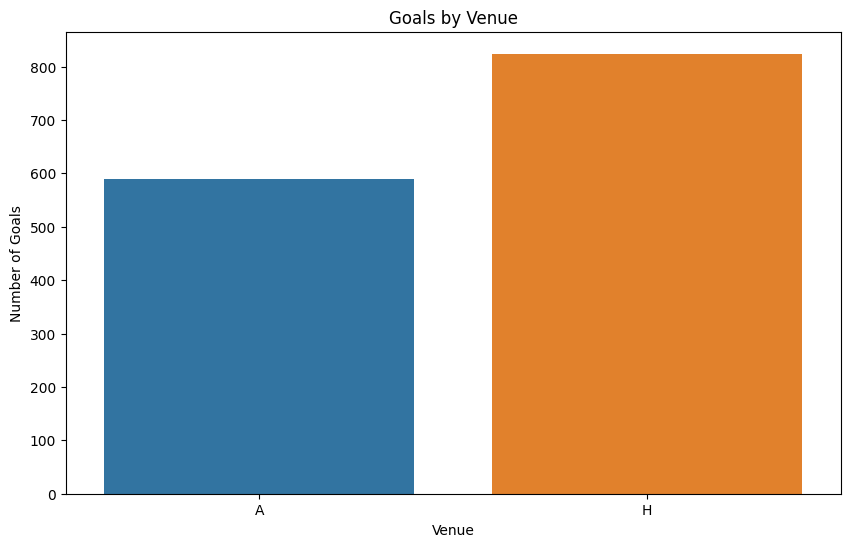

In [48]:
#Visual 1 - Goals by Venue


venue_goals = cleaned_df.groupby('Venue')['index'].count().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Venue', y='index', data=venue_goals)
plt.title('Goals by Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Goals')
plt.show()

*Answer to research question:* Messi and Ronaldo tend to score more goals in Home venue more than Away Venue as shown in Visual 1

*Research question 2:* Show the relationship between Messi & Ronaldo goals and the Club they scored for in each of their goals, provide a visulization.

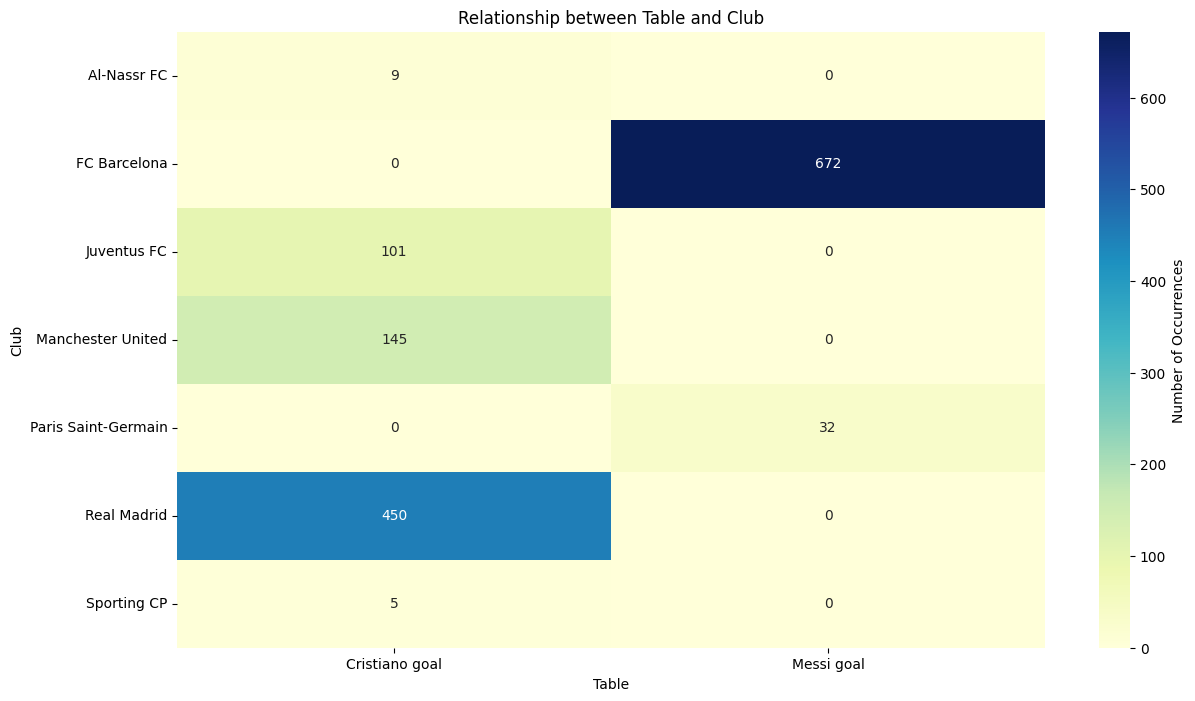

In [49]:
#Visual 1 - Goals by Club

club_table_counts = cleaned_df.groupby('Club')['Table'].value_counts().unstack().fillna(0)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.heatmap(club_table_counts, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Relationship between Table and Club')
plt.xlabel('Table')
plt.ylabel('Club')
plt.show()

*Answer to research question:* 

#Messi Scored#

*672 Goals for FC Barcelona*

*32 Goals for Paris Saint German*.


----------------------------


#Cristiano Scored#

*5 Goals for Sporting CP*

*450 Goals for Real Madrid*

*145 Goals for Manchester United*

*101 Goals for Juventus FC*

*32 Goals for Al-Nassr FC*



### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* 

If I had more time to complete the project, I would conduct a thorough data quality assessment to identify and address any missing or inconsistent values in the dataset. I would also explore additional research questions such as player performance trends over different seasons, the impact of playing position on goal-scoring, and any correlations between specific match variables and player success. Additionally, I would consider incorporating external data sources for a more comprehensive analysis, such as player attributes and team statistics.